# Descriptive metadata overview

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

In [2]:
# load metadata

df_meta = pd.read_csv("datasets/2020-03-20/metadata.csv")

In [3]:
df_meta.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license


#### Publication years

In [4]:
import re

def get_year(s):
    if pd.isna(s):
        return np.nan
    return re.search(r"(\d{4})", s).group(1)

df_meta["year"] = df_meta["publish_time"].apply(get_year)

In [5]:
df_meta.year.describe()

count     34197
unique       58
top        2020
freq       3099
Name: year, dtype: object

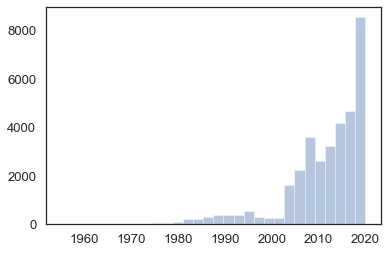

In [6]:
sns.distplot(df_meta.year.tolist(), bins=30, kde=False)

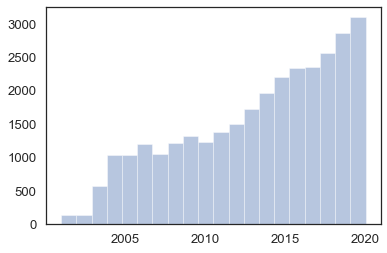

In [7]:
sns.distplot(df_meta[(pd.notnull(df_meta.year)) & (df_meta.year > "2000")].year.tolist(), bins=20, hist=True, kde=False)

#### Null values

In [8]:
df_meta.shape

(44220, 16)

In [9]:
sum(pd.notnull(df_meta.abstract))

35806

In [10]:
sum(pd.notnull(df_meta.doi))

40750

In [11]:
sum(pd.notnull(df_meta.pmcid))

23319

In [12]:
sum(pd.notnull(df_meta.pubmed_id))

22943

In [13]:
sum(pd.notnull(df_meta.journal))

33173

In [14]:
sum(pd.notnull(df_meta.has_full_text))

44220

#### Journals

In [15]:
df_meta.journal.value_counts()[:30]

PLoS One                                               1562
Virology                                                816
Emerg Infect Dis                                        749
The Lancet                                              580
Viruses                                                 554
Virus Research                                          528
Sci Rep                                                 486
Veterinary Microbiology                                 486
Vaccine                                                 450
Journal of Virological Methods                          416
Journal of Clinical Virology                            375
PLoS Pathog                                             359
Virol J                                                 357
The Lancet Infectious Diseases                          347
Antiviral Research                                      337
BMC Infect Dis                                          246
American Journal of Infection Control   

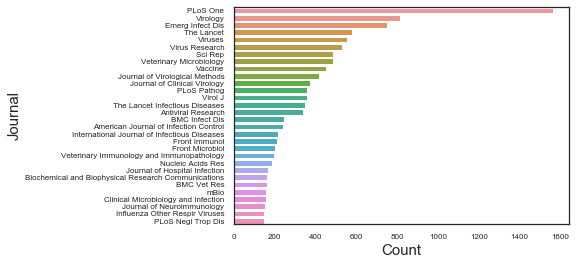

In [16]:
df_sub = df_meta[df_meta.journal.isin(df_meta.journal.value_counts()[:30].index.tolist())]
b = sns.countplot(y="journal", data=df_sub, order=df_sub['journal'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Journal",fontsize=15)
b.tick_params(labelsize=8)

#### Sources and licenses

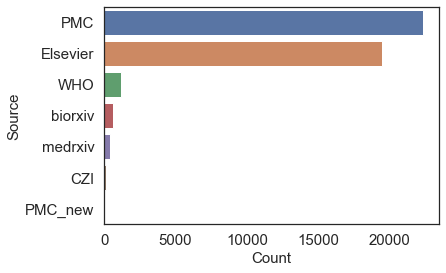

In [17]:
# source
df_sub = df_meta[df_meta.source_x.isin(df_meta.source_x.value_counts()[:30].index.tolist())]
b = sns.countplot(y="source_x", data=df_sub, order=df_sub['source_x'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Source",fontsize=15)
b.tick_params(labelsize=15)

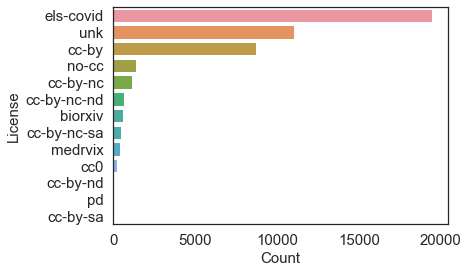

In [18]:
# license
df_sub = df_meta[df_meta.license.isin(df_meta.license.value_counts()[:30].index.tolist())]
b = sns.countplot(y="license", data=df_sub, order=df_sub['license'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("License",fontsize=15)
b.tick_params(labelsize=15)

#### Full text availability

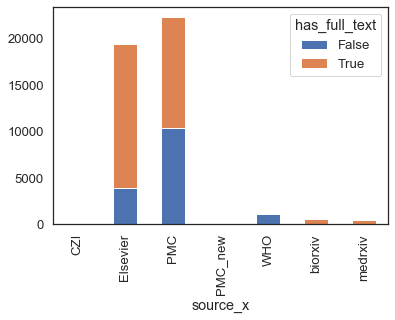

In [19]:
# full text x source
df_plot = df_meta.groupby(['has_full_text', 'source_x']).size().reset_index().pivot(columns='has_full_text', index='source_x', values=0)
df_plot.plot(kind='bar', stacked=True)

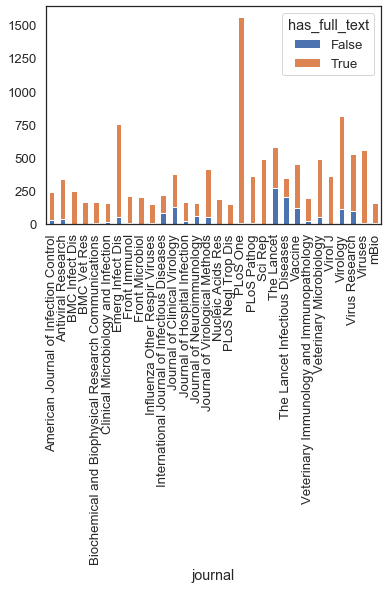

In [20]:
# full text x journal
df_sub = df_meta[df_meta.journal.isin(df_meta.journal.value_counts()[:30].index.tolist())]
df_plot = df_sub.groupby(['has_full_text', 'journal']).size().reset_index().pivot(columns='has_full_text', index='journal', values=0)
df_plot.plot(kind='bar', stacked=True)

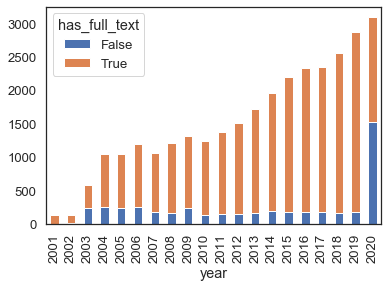

In [21]:
# full text x year
df_sub = df_meta[(pd.notnull(df_meta.year)) & (df_meta.year > "2000")]
df_plot = df_sub.groupby(['has_full_text', 'year']).size().reset_index().pivot(columns='has_full_text', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)

### Coverage wrt Dimensions and WHO

This is still problematically low..

In [22]:
# datasets

who_latest = "../covid-19/datasets/WHO_18_03_2020.csv"
dimensions_latest = "../covid-19/datasets/Dimensions_18_03_2020.csv"

df_who = pd.read_csv(who_latest)
df_dimensions = pd.read_csv(dimensions_latest)

In [23]:
who_dois = df_who[pd.notnull(df_who["DOI"])]["DOI"].tolist()
dimensions_dois = df_dimensions[pd.notnull(df_dimensions["DOI"])]["DOI"].tolist()

In [24]:
cord_dois = df_meta[pd.notnull(df_meta["doi"])]["doi"].tolist()

In [25]:
len(cord_dois)

40750

In [26]:
len(set(cord_dois).intersection(set(who_dois)))/len(set(who_dois))

0.6613496932515337

In [27]:
len(set(cord_dois).intersection(set(dimensions_dois)))/len(set(dimensions_dois))

0.5523578363384188

## Abstracts

In [28]:
abstracts = df_meta[pd.notnull(df_meta["abstract"])].abstract.tolist()
abstracts[0]

'Abstract The etiologic basis for the vast majority of cases of congenital heart disease remains largely undefined. Viruses have been considered to be likely candidates since the recognition of the association between intrauterine rubella and congenital heart disease. Although the pathogenesis of cardiovascular defects is poorly understood, information gained from the study of congenital rubella syndrome suggests that mechanisms such as focal endothelial cell damage, resulting in obliteration of vascular supply, decreased growth rate, and shortened survival time of certain cells, and disturbed DNA replication in cells whose chromosomes were damaged secondary to the effects of virus replication may be operative in the production of defects in the developing fetus. In addition to rubella there is suggestive, but not conclusive, evidence that Coxsackie B3 and B4 virus infections during pregnancy can result in the birth of infants with a variety of types of congenital heart lesions and tha

#### Topic modelling

In [30]:
from tqdm import tqdm
import gensim, sklearn, spacy
import pyLDAvis.gensim

In [31]:
!python -m spacy download en


    Linking successful
    /anaconda3/envs/covid/lib/python3.7/site-packages/en_core_web_sm -->
    /anaconda3/envs/covid/lib/python3.7/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [32]:
nlp = spacy.load('en')
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

In [33]:
%%time

processed_docs = list()
for doc in nlp.pipe(abstracts, n_threads=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    #ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than one word.
    #doc.extend([str(entity) for entity in ents if len(entity) > 1])
                        
    processed_docs.append(doc)

CPU times: user 1h 28min 3s, sys: 8min 31s, total: 1h 36min 35s
Wall time: 27min 9s


In [34]:
import pickle

pickle.dump(processed_docs, open("working_folder/processed_docs.pk", "wb"))

In [50]:
import pickle

processed_docs = pickle.load(open("working_folder/processed_docs.pk", "rb"))

In [35]:
docs = processed_docs
del processed_docs

# Add bigrams
from gensim.models.phrases import Phrases
# Add bigrams to docs (only ones that appear several times or more). A better approach would be to use a chi_sq test.
bigram = Phrases(docs, min_count=50)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [36]:
# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 10

In [37]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of docs: %d (%d)' % (len(corpus),len(abstracts)))

Number of unique tokens: 13736
Number of docs: 35806 (35806)


In [38]:
%%time

from gensim.models import LdaMulticore, LdaModel
params = {'num_topics': 15,'passes': 3, 'random_state': seed}
model = LdaModel(corpus=corpus, num_topics=params['num_topics'], id2word=dictionary, #workers=6,
                passes=params['passes'], random_state=params['random_state'])

CPU times: user 1min 12s, sys: 530 ms, total: 1min 12s
Wall time: 1min 9s


In [39]:
model.show_topics(num_words=5, num_topics=params['num_topics'])

[(0,
  '0.029*"health" + 0.016*"outbreak" + 0.016*"disease" + 0.014*"public" + 0.012*"epidemic"'),
 (1,
  '0.055*"cell" + 0.044*"virus" + 0.027*"mouse" + 0.024*"infection" + 0.015*"strain"'),
 (2,
  '0.013*"-PRON-" + 0.013*"method" + 0.012*"base" + 0.012*"model" + 0.011*"datum"'),
 (3,
  '0.050*"cell" + 0.026*"response" + 0.022*"infection" + 0.018*"immune" + 0.017*"expression"'),
 (4,
  '0.046*"rna" + 0.041*"virus" + 0.025*"viral" + 0.020*"gene" + 0.019*"replication"'),
 (5,
  '0.028*"disease" + 0.021*"human" + 0.020*"virus" + 0.016*"pathogen" + 0.015*"host"'),
 (6,
  '0.018*"lung" + 0.015*"treatment" + 0.013*"patient" + 0.011*"increase" + 0.010*"rat"'),
 (7,
  '0.089*"antibody" + 0.021*"serum" + 0.020*"neutralize" + 0.013*"monoclonal" + 0.013*"group"'),
 (8,
  '0.035*"activity" + 0.023*"antiviral" + 0.023*"drug" + 0.017*"inhibitor" + 0.014*"compound"'),
 (9,
  '0.093*"vaccine" + 0.022*"response" + 0.021*"vaccination" + 0.018*"vector" + 0.016*"challenge"'),
 (10,
  '0.045*"sars" + 0.03

In [40]:
# plot topics (NOTE: the IDs here do not match those from the model)
data =  pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.display(data)

In [41]:
# topics over time
# the topics of ALL the documents of our corpus

df_local = df_meta[pd.notnull(df_meta["abstract"])]
publication_years = df_local.year.tolist()
dois = df_local.doi.tolist()
topics = np.zeros((len(docs),params['num_topics']))

for n,doc_topics in enumerate(model.get_document_topics(corpus)):
    for t in doc_topics:
        topics[n][t[0]] = t[1]

In [42]:
topics[0,:]

array([0.        , 0.07107319, 0.        , 0.03701   , 0.01997785,
       0.44539011, 0.15585743, 0.        , 0.        , 0.15221679,
       0.        , 0.        , 0.11533356, 0.        , 0.        ])

In [43]:
model.get_document_topics(corpus[0])

[(1, 0.07108809),
 (3, 0.037008233),
 (4, 0.019961227),
 (5, 0.44539213),
 (6, 0.15585661),
 (9, 0.15221663),
 (12, 0.115335986)]

In [44]:
df_topics = pd.DataFrame(topics)

In [45]:
df_topics["year"] = publication_years
df_topics["doi"] = dois

In [46]:
from_which_year = "2000"

grouped = df_topics.groupby('year')
df_grouped = grouped.aggregate(np.mean)
df_grouped = df_grouped[df_grouped.index >= from_which_year]
#df_grouped

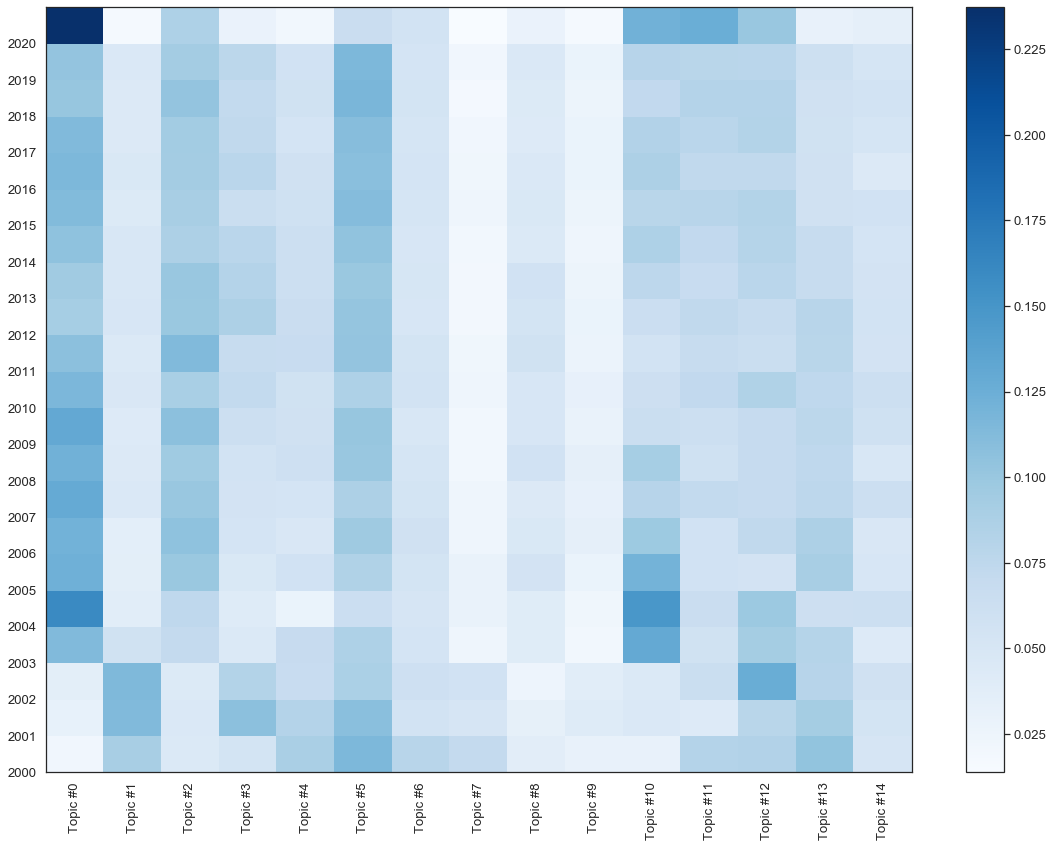

In [47]:
fig = plt.figure(figsize=(16, 12))
plt.pcolor(df_grouped.to_numpy(), norm=None, cmap='Blues')
plt.yticks(np.arange(df_grouped.to_numpy().shape[0]), df_grouped.index.values)
plt.xticks(np.arange(df_grouped.to_numpy().shape[1])+0.5, ["Topic #"+str(n) for n in range(model.num_topics)], rotation = 90)
plt.colorbar(cmap='Blues')  # plot colorbar
plt.tight_layout()  # fixes margins
plt.show()

#### Language modelling

In [48]:
from gensim.models import Word2Vec
import pickle

processed_docs = pickle.load(open("working_folder/processed_docs.pk", "rb"))

model = Word2Vec(processed_docs, size=256, window=10, min_count=2, workers=6)

In [60]:
model.wv.most_similar("coronavirus")

[('covs', 0.6213951110839844),
 ('cov', 0.5569019317626953),
 ('betacoronavirus', 0.5159227252006531),
 ('hcov', 0.5097371935844421),
 ('hcovs', 0.4788876175880432),
 ('emc', 0.47058019042015076),
 ('coronaviral', 0.45542171597480774),
 ('coronaviruses', 0.4521493911743164),
 ('btcov', 0.44664597511291504),
 ('virus', 0.4357568621635437)]

#### Keyword extraction

Using [RAKE](https://csurfer.github.io/rake-nltk/_build/html/index.html)

In [39]:
from rake_nltk import Rake

# Uses stopwords for English from NLTK, and all puntuation characters by default
r = Rake(min_length=2)

# Extraction given the text
r.extract_keywords_from_text(abstracts[0])

In [40]:
# To get keyword phrases ranked highest to lowest.
r.get_ranked_phrases()[:10]

['congenital heart disease remains largely undefined',
 'intrauterine mumps virus infection may',
 'induced congenital heart disease',
 'focal endothelial cell damage',
 'allow even suggestive associations',
 'congenital rubella syndrome suggests',
 'congenital heart disease',
 'congenital heart lesions',
 'virus replication may',
 'maternal viral infection']

In [41]:
# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()[:10]

[(30.333333333333332, 'congenital heart disease remains largely undefined'),
 (20.166666666666664, 'intrauterine mumps virus infection may'),
 (16.333333333333332, 'induced congenital heart disease'),
 (16.0, 'focal endothelial cell damage'),
 (16.0, 'allow even suggestive associations'),
 (15.0, 'congenital rubella syndrome suggests'),
 (12.333333333333332, 'congenital heart disease'),
 (11.0, 'congenital heart lesions'),
 (10.666666666666666, 'virus replication may'),
 (10.0, 'maternal viral infection')]

In [56]:
len(processed_docs)

35806

In [65]:
r = Rake(min_length=2, max_length=3)
# Extraction given the list of strings where each string is a sentence.
r.extract_keywords_from_sentences([" ".join(d) for d in processed_docs])

In [66]:
# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()[:50]

[(9.0, 'welcome adam vaughan'),
 (9.0, 'wash hand thoroughly'),
 (9.0, 'trypsin cod trypsin'),
 (9.0, 'trichothecene mycotoxin deoxynivalenol'),
 (9.0, 'tolerance self rna'),
 (9.0, 'summarize presentation discussion'),
 (9.0, 'suffer cold addition'),
 (9.0, 'substitute mask alternative'),
 (9.0, 'strategy widely applicable'),
 (9.0, 'start codon suggest'),
 (9.0, 'set richard smyth'),
 (9.0, 'remain committed neurorehabilitation'),
 (9.0, 'new york dutton'),
 (9.0, 'measure cleavage angiotensin'),
 (9.0, 'join faculty worker'),
 (9.0, 'influence hbv transcription'),
 (9.0, 'illustrate application pandemic'),
 (9.0, 'haq posthoc conclusion'),
 (9.0, 'febrile tachypneic hypoxic'),
 (9.0, 'explore hypothesis conserved'),
 (9.0, 'expect effort different'),
 (9.0, 'expand initial cohort'),
 (9.0, 'envoy ming emperor'),
 (9.0, 'endoplasmic reticulum glucosidas'),
 (9.0, 'draw attention lately'),
 (9.0, 'describe pathology esophagus'),
 (9.0, 'describe management case'),
 (9.0, 'declare comp